In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./Abalone dataset.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [10]:
#Sex 컬럼 레이블 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

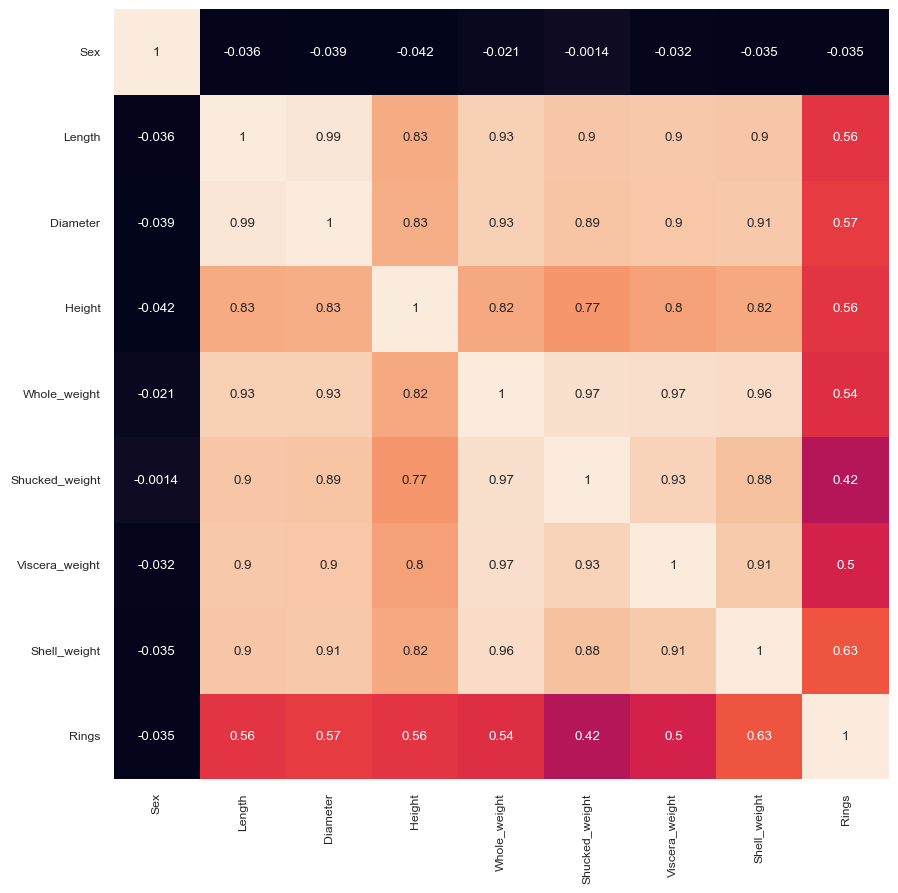

In [11]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [23]:
X = df.drop(['Rings'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_Category
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [25]:
Y = pd.get_dummies(y).values

In [26]:
X = X.values
X

array([[2.    , 0.455 , 0.365 , ..., 0.101 , 0.15  , 2.    ],
       [2.    , 0.35  , 0.265 , ..., 0.0485, 0.07  , 1.    ],
       [0.    , 0.53  , 0.42  , ..., 0.1415, 0.21  , 1.    ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.2875, 0.308 , 1.    ],
       [0.    , 0.625 , 0.485 , ..., 0.261 , 0.296 , 1.    ],
       [2.    , 0.71  , 0.555 , ..., 0.3765, 0.495 , 2.    ]])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 9), (3341, 28), (836, 9), (836, 28))

In [34]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(9,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,391 (5.43 KB)

 Trainable params: 1,391 (5.43 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=9,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 9/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 

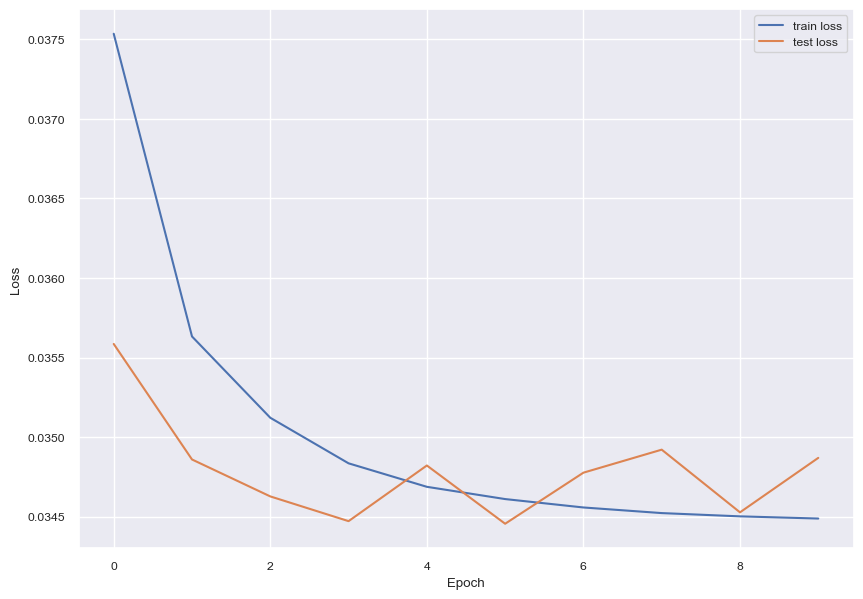

In [36]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0349 - mse: 0.0349


[0.03486931324005127, 0.03486931324005127]